In [142]:
import os 
import sys
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'scripts'))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.ticker as ticker



import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


data_file = "googleplaystore.csv"

PROJECT_DIR = os.path.dirname(os.getcwd())
DATA_DIR = os.path.join(PROJECT_DIR, 'data', 'csv', 'V2')

DATA_FILE = os.path.join(DATA_DIR, data_file)

df = pd.read_csv(DATA_FILE)

In [4]:
import pandas as pd
df = pd.read_csv('../data/csv/V2/googleplaystore_corrected.csv')

df.drop_duplicates(inplace=True)
df.drop(df[df['Size'] == '1,000+'].index, inplace=True)

df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
#drop Size data with string that could not be converted to float
df.drop(df[df['Size'] == '1,000+'].index, inplace=True)
df.drop(df[df['Category'].str.contains('1.9')].index, inplace=True)
df['Size'] = df['Size'].str.replace('M', '000000').str.replace('k', '000').str.replace('Varies with device', 'NaN').astype(float)
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

# Cleaning Price column
df['Price'] = df['Price'].str.replace('$', '').astype(float)

# Handling date formats
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Cleaning Size column
# Assuming 'k' denotes kilobytes and 'M' denotes megabytes
df['Size'] = df['Size'].apply(lambda x: x * 1024 if 'k' in str(x) else x)

df.dropna(inplace=True)



In [5]:
df.to_csv('../data/csv/V2/data.csv', index=False)

In [2]:
import csv

# Path to your original CSV file
csv_file = '/Users/david/Desktop/analisis/portafolio-ds/usa-data/data/csv/V2/googleplaystore.csv'
# Path to the corrected CSV file
corrected_csv_file = '/Users/david/Desktop/analisis/portafolio-ds/usa-data/data/csv/V2/googleplaystore_corrected.csv'
# Path to the log file for problematic lines
log_file = '/Users/david/Desktop/analisis/portafolio-ds/usa-data/data/csv/V2/problematic_lines.log'

# Open the original CSV file for reading and the corrected CSV file for writing
with open(csv_file, 'r', encoding='utf-8') as infile, \
     open(corrected_csv_file, 'w', newline='', encoding='utf-8') as outfile, \
     open(log_file, 'w', encoding='utf-8') as logfile:
    
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    header = next(reader)
    expected_columns = len(header)
    
    writer.writerow(header)  # Write the header to the corrected CSV file
    
    for i, row in enumerate(reader, start=2):  # Start at 2 to account for the header
        if len(row) == expected_columns:
            writer.writerow(row)  # Write the row to the corrected CSV file if it has the correct number of columns
        else:
            logfile.write(f"Line {i} has {len(row)} columns: {row}\n")  # Log problematic lines

print("CSV file has been checked and corrected file has been saved.")
print(f"Corrected file: {corrected_csv_file}")
print(f"Problematic lines log: {log_file}")


CSV file has been checked and corrected file has been saved.
Corrected file: /Users/david/Desktop/analisis/portafolio-ds/usa-data/data/csv/V2/googleplaystore_corrected.csv
Problematic lines log: /Users/david/Desktop/analisis/portafolio-ds/usa-data/data/csv/V2/problematic_lines.log


<AxesSubplot:title={'center':'Number of Apps per Year'}>

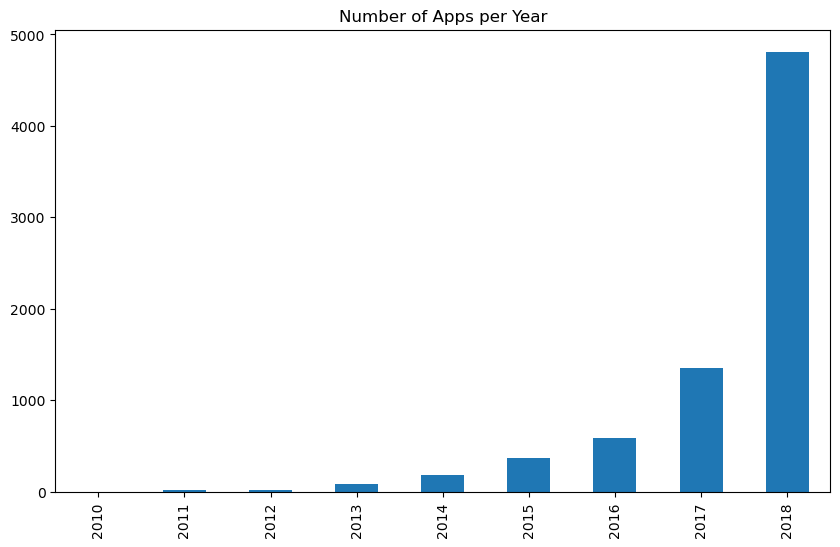

In [26]:
df['Last Updated'].dt.year.value_counts().sort_index().plot(kind='bar', figsize=(10, 6), title='Number of Apps per Year')


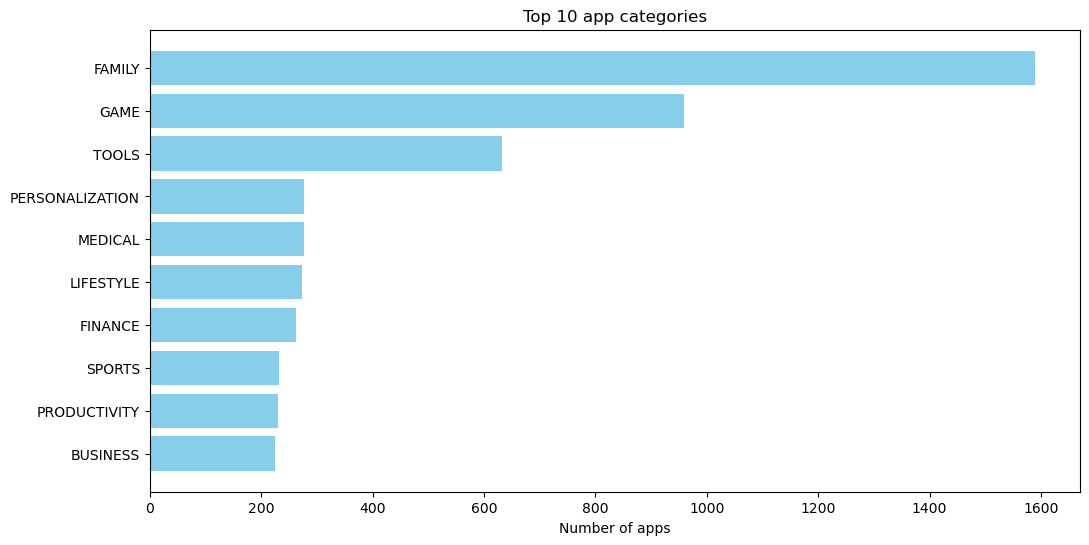

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data


# Count the number of apps in each category
category_counts = df['Category'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(12,6))
plt.barh(category_counts.index, category_counts.values, color='skyblue')
plt.xlabel('Number of apps')
plt.title('Top 10 app categories')
plt.gca().invert_yaxis()  # Reverse the order of categories
plt.show()

In [76]:
df_filtered[['Category', 'Rating']].to_csv('df_filtered.csv', index=False)

In [79]:
df_filtered['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10833    4.8
10834    4.0
10836    4.5
10837    5.0
10840    4.5
Name: Rating, Length: 7418, dtype: float64

En general, the distribution of ratings for downloaded applications is similar to the distribution of ratings for all applications on the Play Store. Most downloaded applications have a rating of 4 or 5 stars. Applications with lower ratings are less common.

The results of this graph suggest that users are generally satisfied with the quality of the applications available on the Play Store and are willing to download them. However, there are some categories in which users may be less satisfied, such as entertainment, medicine, or home applications. This may be due to a variety of factors, such as the quality of the applications, the relevance of the applications, or user satisfaction with the price of the applications.

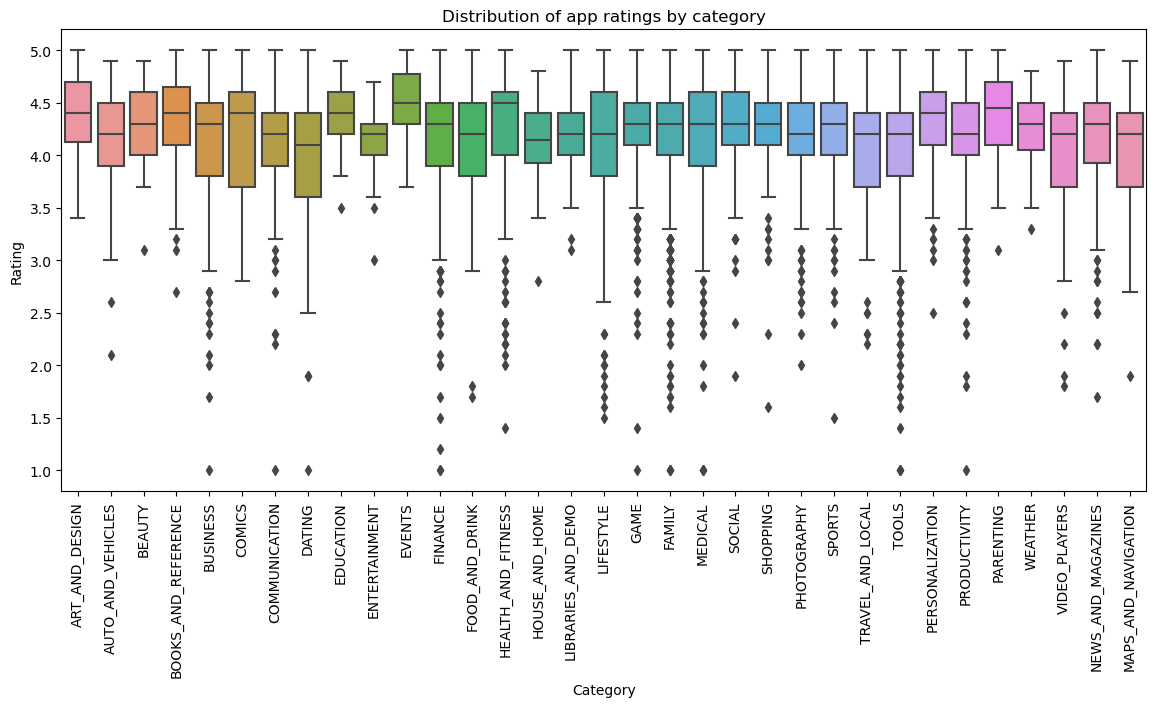

In [71]:
# Filter out rows where 'Rating' or 'Category' is missing
df_filtered = df.dropna(subset=['Rating', 'Category'])

# Create a boxplot
plt.figure(figsize=(14,6))
sns.boxplot(x='Category', y='Rating', data=df_filtered)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('Distribution of app ratings by category')
plt.show()

Applications with ratings of 4 or 5 stars have a much higher number of installations than applications with lower ratings. In the left graph, applications with a 5-star rating have installations of up to 100 million.

The results of these graphs suggest that users are more willing to install applications with higher ratings. This may be due to a variety of factors, such as users' confidence in the quality of the applications, recommendations from other users, or the relevance of the applications to users' needs.

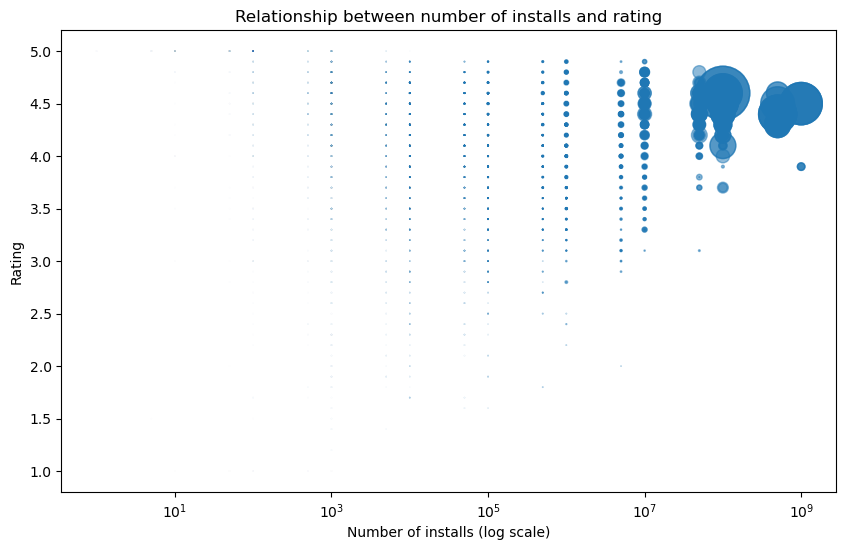

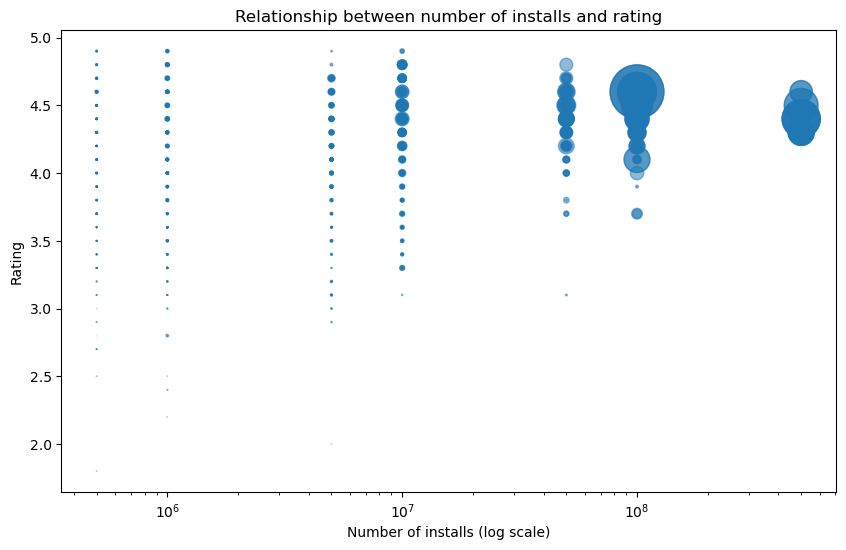

In [80]:
import numpy as np

# Convert 'Installs' to numeric after removing '+' and ',' characters

# Filter out rows where 'Rating', 'Reviews' or 'Installs' is missing
df_filtered = df.dropna(subset=['Rating', 'Reviews', 'Installs'])

# Convert 'Reviews' to numeric
df_filtered['Reviews'] = pd.to_numeric(df_filtered['Reviews'])

# Create a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df_filtered['Installs'], df_filtered['Rating'], alpha=0.5,
            s=df_filtered['Reviews']/30000)  # Size of points represents number of reviews
plt.xscale('log')  # Use a log scale for the x-axis to better visualize the data
plt.xlabel('Number of installs (log scale)')
plt.ylabel('Rating')
plt.title('Relationship between number of installs and rating')
plt.show()

#filter from 10^3 to 10^9
df_filtered = df_filtered[(df_filtered['Installs'] < 1000000000)&(df_filtered['Installs'] > 100000)]

# Create a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df_filtered['Installs'], df_filtered['Rating'], alpha=0.5,
            s=df_filtered['Reviews']/30000)  # Size of points represents number of reviews
plt.xscale('log')  # Use a log scale for the x-axis to better visualize the data
plt.xlabel('Number of installs (log scale)')
plt.ylabel('Rating')
plt.title('Relationship between number of installs and rating')
plt.show()


In general, application ratings are quite high, with a median of 4.3. Apps categorized as "Everyone" have a larger amount of data, so they are more evenly distributed across different ratings. Apps with a "Mature 17+" rating tend to have lower ratings, which could be attributed to the fact that they are not suitable for all audiences but lack the specific requirements for adult content, significantly reducing their target market.

Despite being a smaller quantity, adult-rated applications receive very favorable ratings, possibly because they effectively reach their intended audience. On the other hand, underrated applications, despite having the fewest ratings, also have the lowest median at 4.1 due to their ambiguity and limited data.

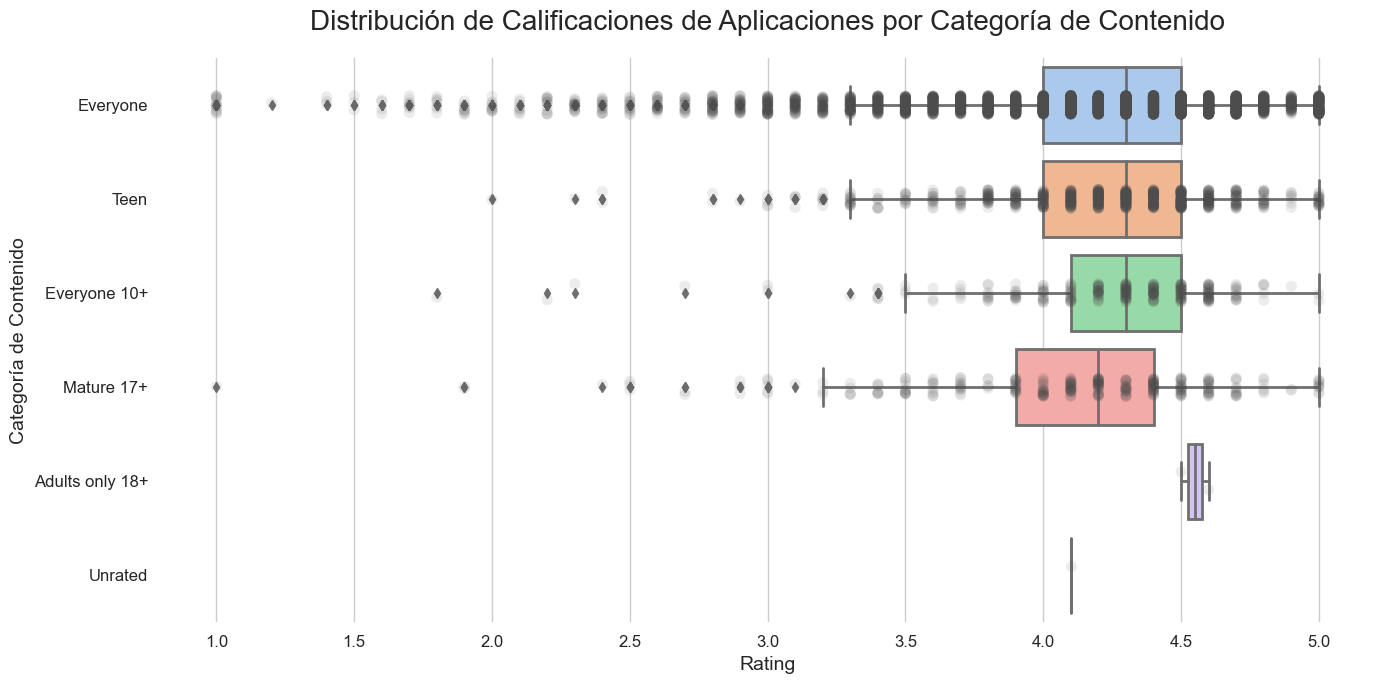

In [108]:

# Filtrar filas donde 'Rating' o 'Content Rating' están vacíos
df_filtered = df.dropna(subset=['Rating', 'Content Rating'])

# Configuración de estilo elegante
sns.set_theme(style="whitegrid", palette="pastel")


# Crear un boxplot con Seaborn
plt.figure(figsize=(14, 7))

sns.stripplot(x='Rating', y='Content Rating', data=df_filtered, size=8, color=".3", linewidth=0, alpha=0.1)

ax = sns.boxplot(x='Rating', y='Content Rating', data=df_filtered, linewidth=2)

# Añadir puntos para cada observación con un toque de transparencia

# Mejoras visuales
plt.title('Distribución de Calificaciones de Aplicaciones por Categoría de Contenido', fontsize=20, pad=20)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Categoría de Contenido', fontsize=14)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))  # Establecer ticks principales cada 0.5 en el eje x
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Añadir un toque de elegancia
sns.despine(left=True, bottom=True)
plt.tight_layout()

# Personalizar el fondo

# Mostrar el gráfico con una transición suave
plt.show()


En este grafico podemos ver mas a detalle como se distribuyen las calificaciones y la cantidad de calificaciones que ha tenido , como podemos ver los histogramas tienen una tendencia a ser picudos con tendencia hacia la derecha, esto quiere decir que la gran mayoria de calificaciones son positivas. Sin embargo tambien se puede ver que las categorias "Adults only 18+" y "Unrated" tienen muy pocos datos respectivamente 2 y 1 datos por lo que no podemos sacar conclusiones validas para estos datos a partir de la base de datos actual. Por otro lado tantos las categorias "Everyone", "Teen", "Everyone 10+" y "Mature 17+" cuenta con datos suficientes para concluir eventualmente y todas con la misma tendencia hacia la derecha.

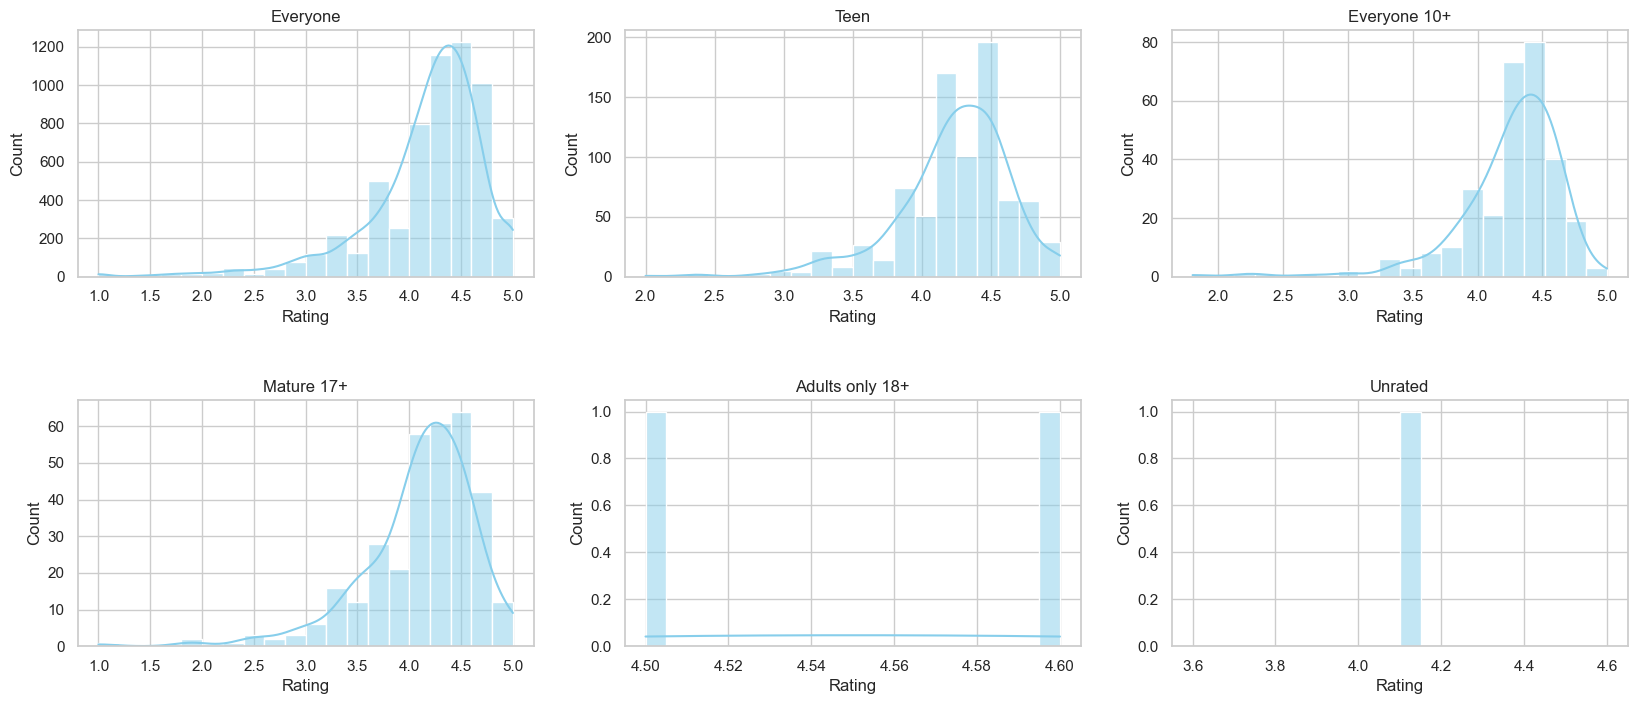

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar filas donde 'Rating' o 'Content Rating' están vacíos
df_filtered = df.dropna(subset=['Rating', 'Content Rating'])

# Crear un histograma
fig, ax = plt.subplots(2, 3, figsize=(20, 8), gridspec_kw={'hspace': 0.5})

content_ratings = df_filtered['Content Rating'].unique()

for i in range(2):
    for j in range(3):
        if i*3 + j < len(content_ratings):
            sns.histplot(df_filtered[df_filtered['Content Rating'] == content_ratings[i*3 + j]],
                         x='Rating', ax=ax[i, j], kde=True, bins=20, color='skyblue')
            ax[i, j].set_title(content_ratings[i*3 + j])
            ax[i, j].set_xlabel('Rating')
            ax[i, j].set_ylabel('Count')
            
plt.show()

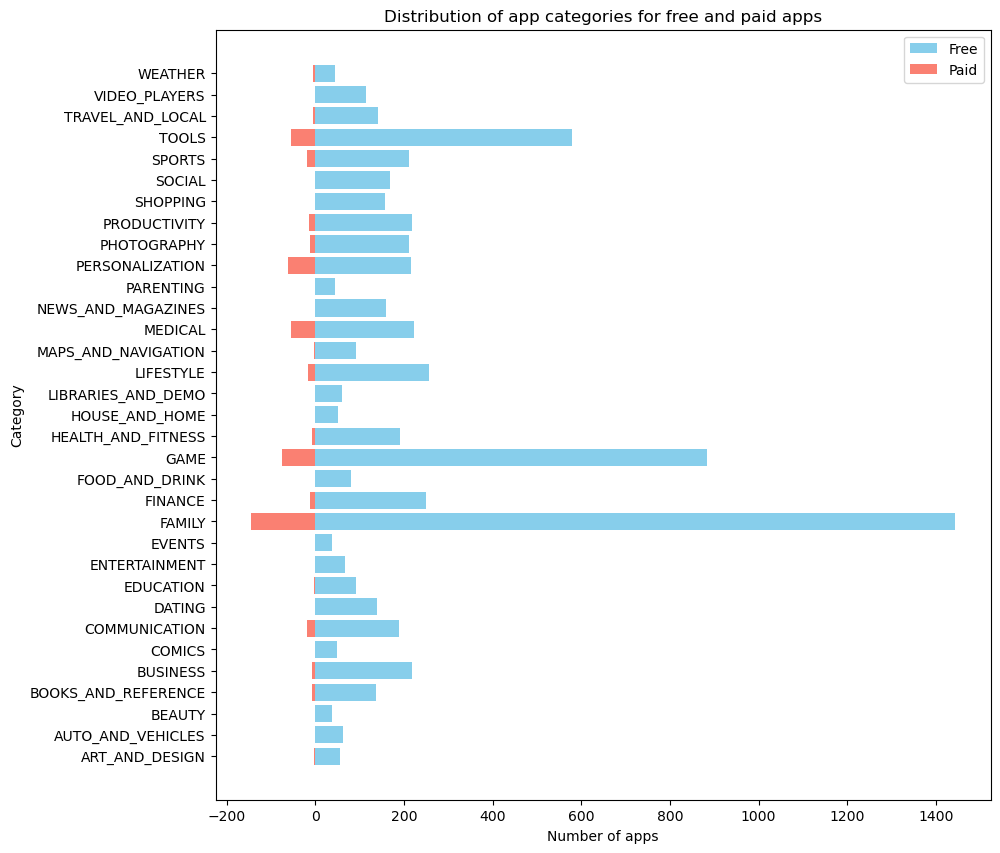

In [49]:
# Preparar los datos
df_free = df[df['Type'] == 'Free']['Category'].value_counts().sort_index()
df_paid = df[df['Type'] == 'Paid']['Category'].value_counts().sort_index()

# Crear un diagrama de pirámide
plt.figure(figsize=(10, 10))
plt.barh(df_free.index, df_free.values, color='skyblue')
plt.barh(df_paid.index, -df_paid.values, color='salmon')
plt.xlabel('Number of apps')
plt.ylabel('Category')
plt.legend(['Free', 'Paid'])
plt.title('Distribution of app categories for free and paid apps')
plt.show()

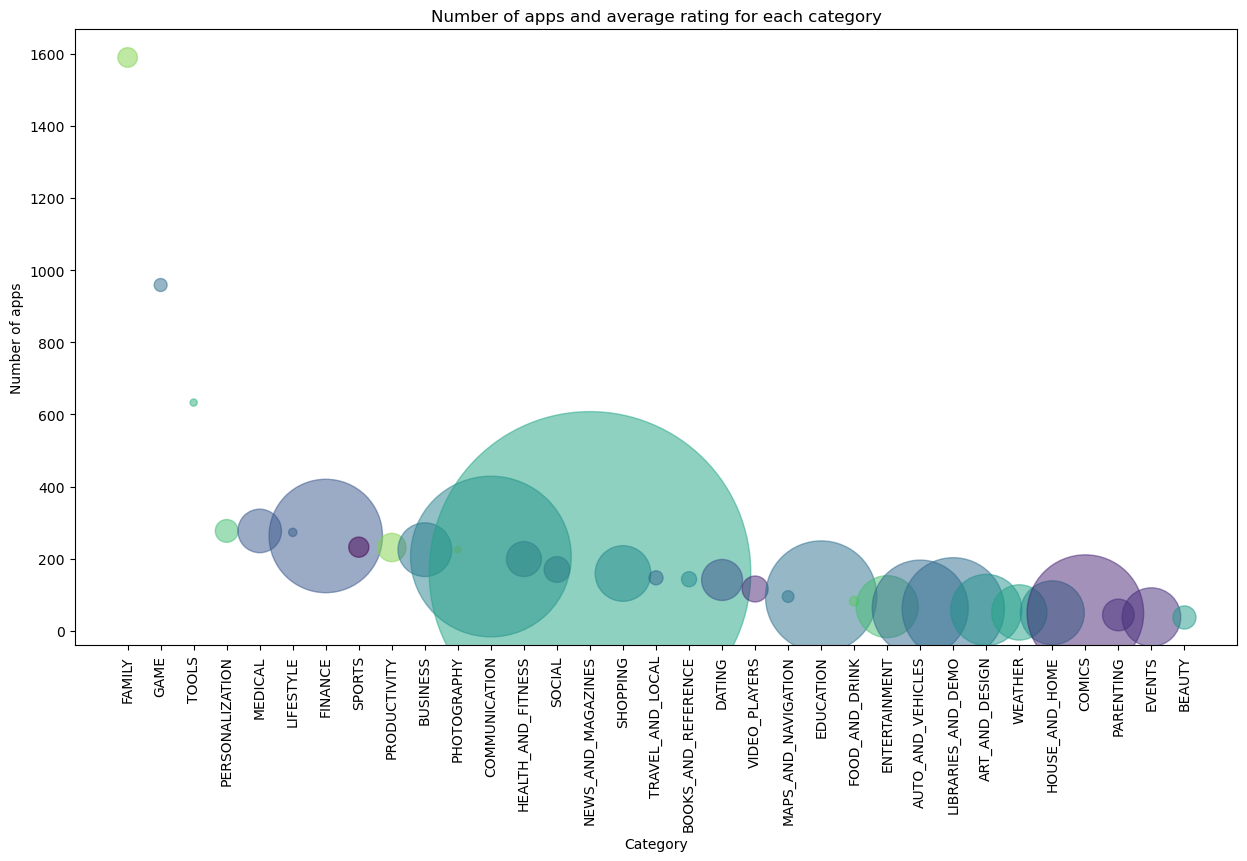

In [70]:
# Preparar los datos
categories = df['Category'].value_counts().index
counts = df['Category'].value_counts().values
ratings = df.groupby('Category')['Rating'].mean().values
installs = df.groupby('Category')['Installs'].sum().values

# Crear un gráfico de burbujas
plt.figure(figsize=(15, 8))
plt.scatter(categories, counts, s=installs/500000, alpha=0.5, c=ratings/10000, cmap='viridis')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Number of apps')
plt.title('Number of apps and average rating for each category')
plt.show()

